In [1]:
import numpy as np
import scipy as sp
from scipy import interpolate
import matplotlib.pyplot as plt

Прежде чем сдать это задание, убедитесь, что все работает должным образом. 
Для этого следует "выполнить всё" в документе.

Убедитесь, что вы заполнили все места, где написано «ВАШ КОД ЗДЕСЬ» или «ВАШ ОТВЕТ ЗДЕСЬ».

In [2]:
NAME = "Pavel Litvinov"
COLLABORATORS = ""

In [3]:
data = np.load("data_7_1.npz")

In [7]:
data["x1"]

array([   0.,  349.,  698., 1047., 1396., 1746., 2095., 2444., 2793.,
       3142., 3492., 4190., 4889., 5587., 6285., 6984., 7682., 8381.,
       9079., 9778.])

#  Вводное задание. 

Вектора х1 и у1 из архива дают значения некоторой функции $f(x) .$ Постройте на графике, используя библиотечные функции:

(a) Интерполяционный Лагранжев многочлен.

(b) Интерполяционный кубический сплайн (CubicSpline).

(c) Монотонный кубический интерполянт (PchipInterpolator).

(d)  Аппроксимацию полиномами, используя функции np. polyfit и np.polyval. 

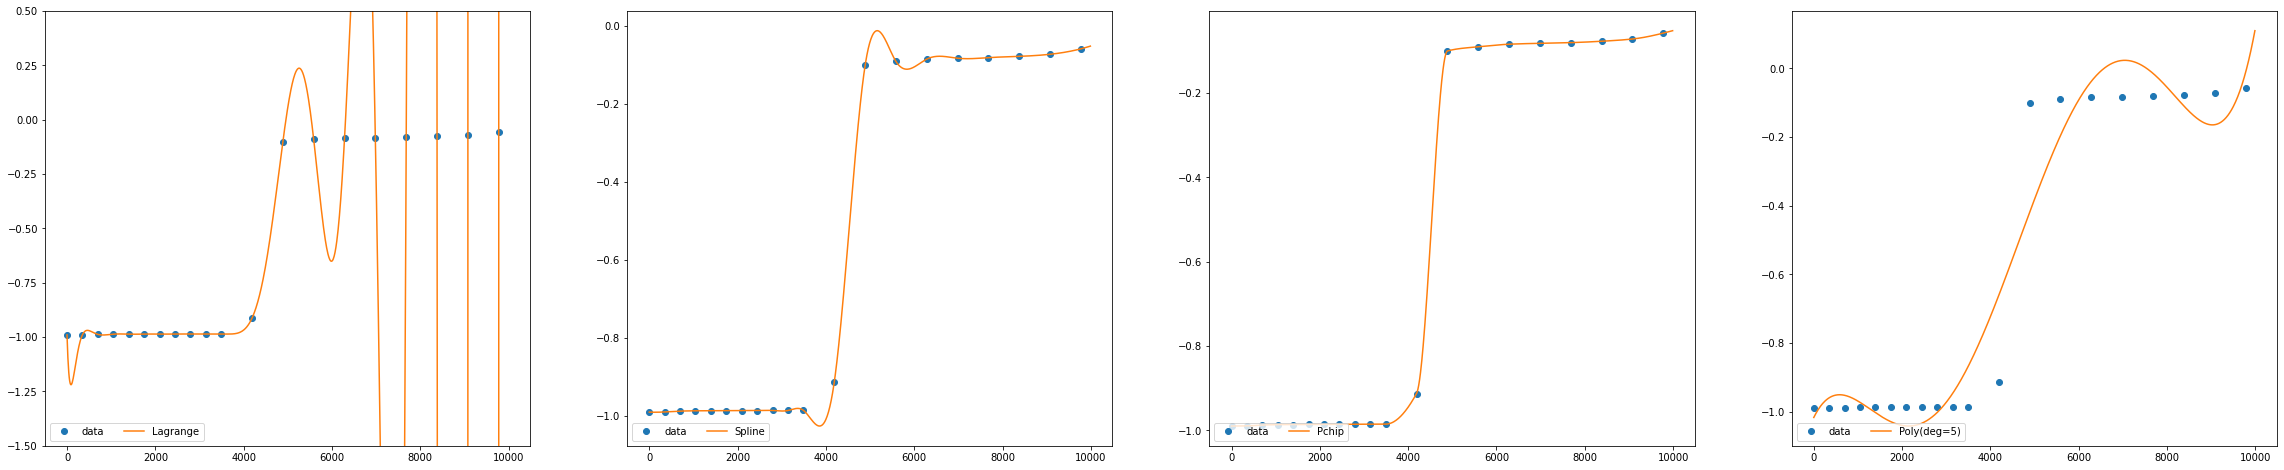

In [12]:
x1 = data["x1"]
y1 = data["y1"]


L = sp.interpolate.lagrange(x1, y1)
S = sp.interpolate.CubicSpline(x1, y1)
Q = sp.interpolate.PchipInterpolator(x1, y1)
P = np.polyfit(x1, y1, 5)

xs = np.arange(0, 10000, 10)
fig, ax = plt.subplots(1,4, figsize=(40, 8))
ax[0].plot(x1, y1, 'o', label='data')
ax[0].plot(xs, L(xs), label="Lagrange")
ax[0].set_ylim(-1.5, 0.5)
ax[1].plot(x1, y1, 'o', label='data')
ax[1].plot(xs, S(xs), label="Spline")

ax[2].plot(x1, y1, 'o', label='data')

ax[2].plot(xs, Q(xs), label="Pchip")
ax[3].plot(x1, y1, 'o', label='data')

ax[3].plot(xs, np.polyval(P, xs), label="Poly(deg=5)")

ax[0].legend(loc='lower left', ncol=2)
ax[1].legend(loc='lower left', ncol=2)
ax[2].legend(loc='lower left', ncol=2)
ax[3].legend(loc='lower left', ncol=2)

---

# Интерполяция полиномом Лагранжа.

Напишите класс, который конструирует интерполяционный полином Лагранжа, проходящий через точки, заданные как `xk` и `yk`.

In [22]:
import numpy as np

class LagrangeInterpolator:
    """Lagrange interpolating polynomial.
    
    Given a set of pairs ``(x_k, y_k)``, construct 
    a Lagrange polynomial ``f(x)``, such that
    
    .. math::

        f(x_k) = y_k   for k =0, ..., n-1
    
    Parameters
    ----------
    xk : array_like, shape(n,)
        Abscissas
    yk : array_like, shape(n,)
        Ordinates
    
    Attributes
    ----------
    __call__
    
    """
    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)
        
    def __call__(self, x):
        """Evaluate the interpolator at a given point.
        
        Parameters
        ----------
        x : float
        
        Returns
        -------
        the value of the interpolator at ``x``.
        """
        val = 0
        N = (self.xk).shape[0]
        for k in range(N):
            xs_k = np.hstack([self.xk[:k],self.xk[k+1:]]) # все x_i без x_k
            Xs = np.array([x for i in range(N-1)]) # охапка из x
            ck = np.prod((Xs - xs_k) / (self.xk[k] - xs_k))
            val += ck * self.yk[k]
        return val
        raise NotImplementedError()

In [23]:
def runge_func(x, a=25):
    return 1.0 / (1.0 + a*x**2)

xx = np.linspace(-2, 2, 21)
yy = runge_func(xx)

lagr = LagrangeInterpolator(xx, yy)

from numpy.testing import assert_allclose

assert_allclose(yy,
                [lagr(xval) for xval in xx],
                atol=1e-14)

## Феномер Рунге

Рассмотрим функцию Рунге, $y = 1/(1 + 25x^2)$. Интерполируйте эту функцию на интервале $x\in [-2, 2]$, используя полином Лагранжа с $m=3, 5, 7, 11$. Используйте равномерную сетку. Нарисуйте результат интерполяции вместе с исходной функцией на одном графике. 

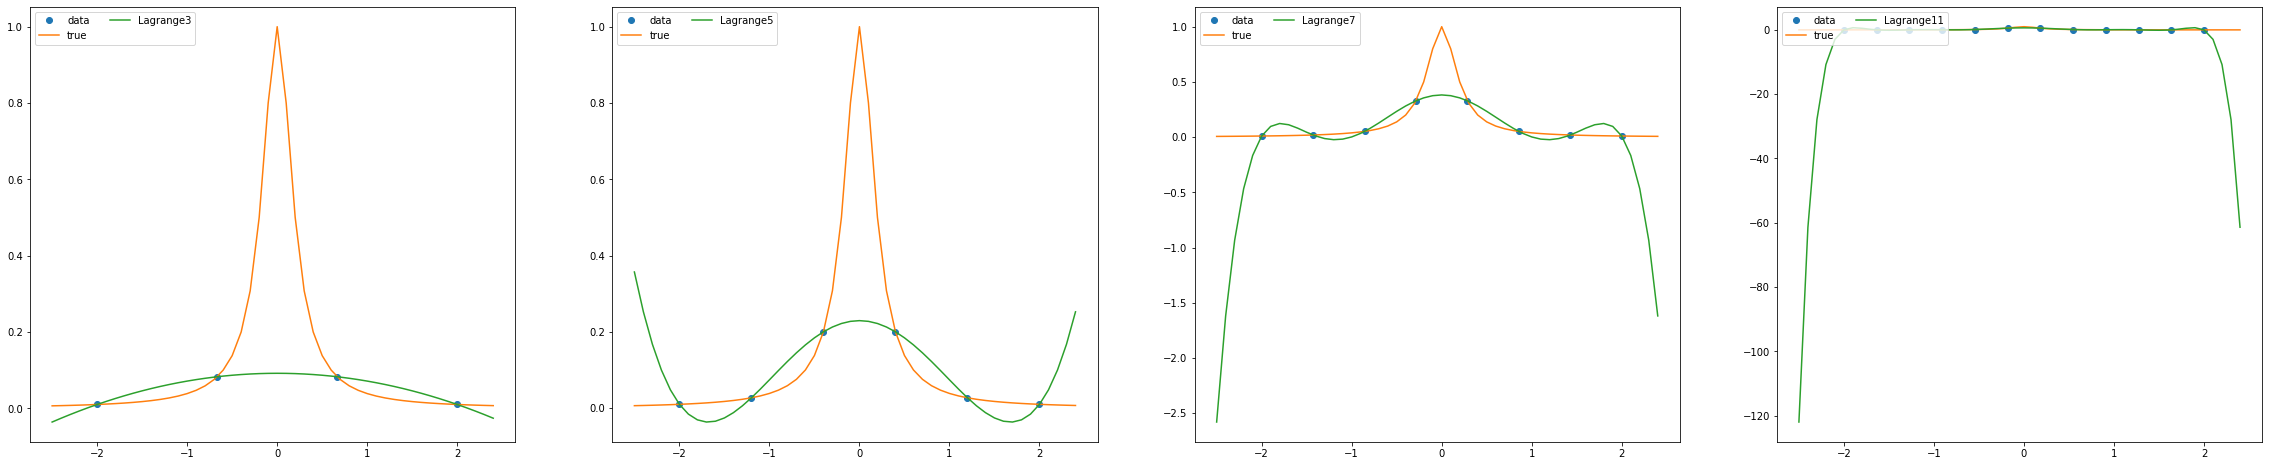

In [33]:
x3 = np.linspace(-2, 2, 4)
y3 = 1/(1+25*x3**2)
L3 = sp.interpolate.lagrange(x3, y3)

x5 = np.linspace(-2, 2, 6)
y5 = 1/(1+25*x5**2)
L5 = sp.interpolate.lagrange(x5, y5)

x7 = np.linspace(-2, 2, 8)
y7 = 1/(1+25*x7**2)
L7 = sp.interpolate.lagrange(x7, y7)

x11 = np.linspace(-2, 2, 12)
y11 = 1/(1+25*x11**2)
L11 = sp.interpolate.lagrange(x11, y11)

xs = np.arange(-2.5, 2.5, 0.1)

fig, ax = plt.subplots(1,4, figsize=(40, 8))
ax[0].plot(x3, y3, 'o', label='data')
ax[0].plot(xs,  1/(1+25*xs**2), label='true')
ax[0].plot(xs, L3(xs), label="Lagrange3")
ax[1].plot(x5, y5, 'o', label='data')
ax[1].plot(xs, 1/(1+25*xs**2), label='true')
ax[1].plot(xs, L5(xs), label="Lagrange5")
ax[2].plot(x7, y7, 'o', label='data')
ax[2].plot(xs, 1/(1+25*xs**2), label='true')
ax[2].plot(xs, L7(xs), label="Lagrange7")
ax[3].plot(x11, y11, 'o', label='data')
ax[3].plot(xs, 1/(1+25*xs**2), label='true')
ax[3].plot(xs, L11(xs), label="Lagrange11")

ax[0].legend(loc='upper left', ncol=2)
ax[1].legend(loc='upper left', ncol=2)
ax[2].legend(loc='upper left', ncol=2)
ax[3].legend(loc='upper left', ncol=2)

Допишите функцию, которая возвращает узлы Чебышева. 

In [40]:
def cheb_nodes(n, a=-1, b=1):
    nodes = sp.special.roots_chebyt(n)[0]
    return nodes*(b-a)/2 +(a+b)/2
    raise NotImplementedError()

array([-0.8660254,  0.       ,  0.8660254])

In [ ]:
nodes_11 = cheb_nodes(11)
nodes_11 = np.asarray(nodes_11)
assert (nodes_11[1:] > nodes_11[:-1]).all()

from scipy.special import roots_chebyt
nodes, weights = roots_chebyt(5) 

assert_allclose(cheb_nodes(5),
                nodes, atol=1e-14)

assert_allclose(cheb_nodes(5, a=-1, b=3),
                nodes*2 + 1, atol=1e-14)

Повторите интерполяцию Лагранжа функции Рунге с помощью узлов Чебышева. Постройте интерполянты.
Также постройте интерполяцию кубическим сплайном тех же данных (`scipy.interpolate.CubicSpline`).
Сравните величину явления Рунге для равномерной сетки и сетки Чебышева. Демонстрирует ли интерполяция сплайнами феномен Рунге?


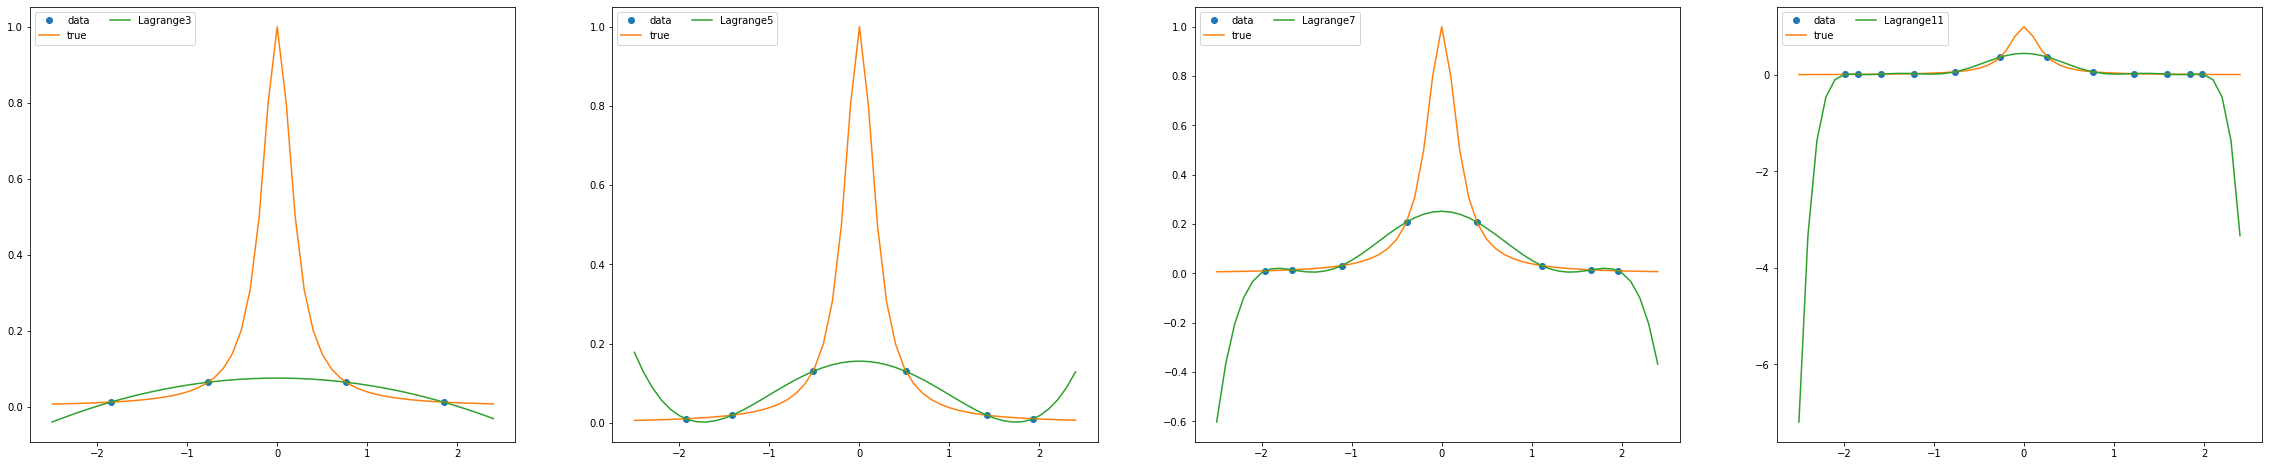

In [44]:
x3 = cheb_nodes(4, -2, 2)
y3 = 1/(1+25*x3**2)
L3 = sp.interpolate.lagrange(x3, y3)

x5 = cheb_nodes(6, -2, 2)
y5 = 1/(1+25*x5**2)
L5 = sp.interpolate.lagrange(x5, y5)

x7 = cheb_nodes(8, -2, 2)
y7 = 1/(1+25*x7**2)
L7 = sp.interpolate.lagrange(x7, y7)

x11 = cheb_nodes(12, -2, 2)
y11 = 1/(1+25*x11**2)
L11 = sp.interpolate.lagrange(x11, y11)

xs = np.arange(-2.5, 2.5, 0.1)

fig, ax = plt.subplots(1,4, figsize=(40, 8))
ax[0].plot(x3, y3, 'o', label='data')
ax[0].plot(xs,  1/(1+25*xs**2), label='true')
ax[0].plot(xs, L3(xs), label="Cheb_Lagrange3")
ax[1].plot(x5, y5, 'o', label='data')
ax[1].plot(xs, 1/(1+25*xs**2), label='true')
ax[1].plot(xs, L5(xs), label="Cheb_Lagrange5")
ax[2].plot(x7, y7, 'o', label='data')
ax[2].plot(xs, 1/(1+25*xs**2), label='true')
ax[2].plot(xs, L7(xs), label="Cheb_Lagrange7")
ax[3].plot(x11, y11, 'o', label='data')
ax[3].plot(xs, 1/(1+25*xs**2), label='true')
ax[3].plot(xs, L11(xs), label="Cheb_Lagrange11")

ax[0].legend(loc='upper left', ncol=2)
ax[1].legend(loc='upper left', ncol=2)
ax[2].legend(loc='upper left', ncol=2)
ax[3].legend(loc='upper left', ncol=2)

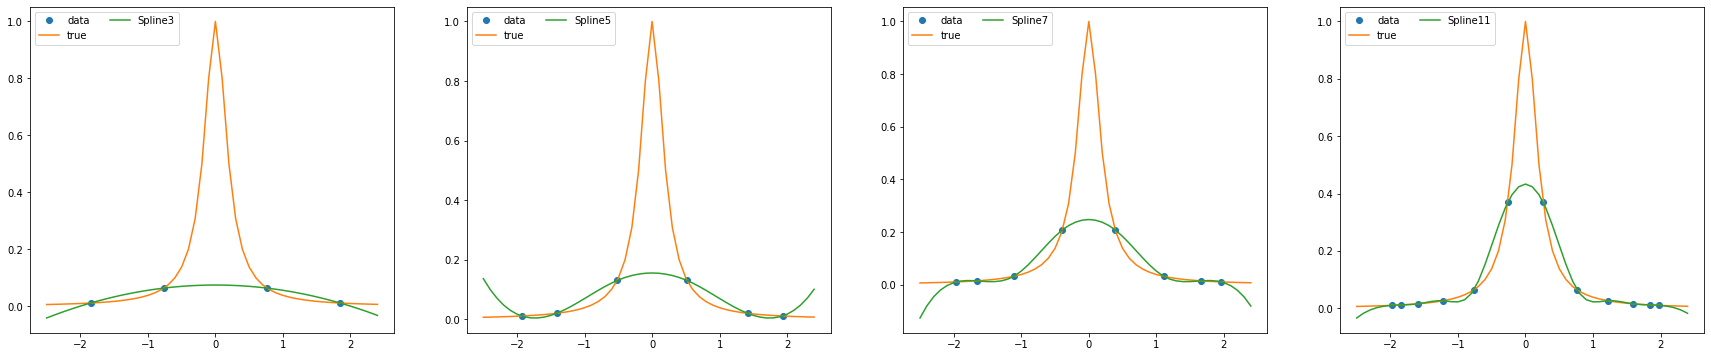

In [46]:
x3 = cheb_nodes(4, -2, 2)
y3 = 1/(1+25*x3**2)
S3 = sp.interpolate.CubicSpline(x3, y3)

x5 = cheb_nodes(6, -2, 2)
y5 = 1/(1+25*x5**2)
S5= sp.interpolate.CubicSpline(x5, y5)

x7 = cheb_nodes(8, -2, 2)
y7 = 1/(1+25*x7**2)
S7 = sp.interpolate.CubicSpline(x7, y7)

x11 = cheb_nodes(12, -2, 2)
y11 = 1/(1+25*x11**2)
S11 = sp.interpolate.CubicSpline(x11, y11)

xs = np.arange(-2.5, 2.5, 0.1)

fig, ax = plt.subplots(1,4, figsize=(30, 6))
ax[0].plot(x3, y3, 'o', label='data')
ax[0].plot(xs,  1/(1+25*xs**2), label='true')
ax[0].plot(xs, S3(xs), label="Spline3")
ax[1].plot(x5, y5, 'o', label='data')
ax[1].plot(xs, 1/(1+25*xs**2), label='true')
ax[1].plot(xs, S5(xs), label="Spline5")
ax[2].plot(x7, y7, 'o', label='data')
ax[2].plot(xs, 1/(1+25*xs**2), label='true')
ax[2].plot(xs, S7(xs), label="Spline7")
ax[3].plot(x11, y11, 'o', label='data')
ax[3].plot(xs, 1/(1+25*xs**2), label='true')
ax[3].plot(xs, S11(xs), label="Spline11")

ax[0].legend(loc='upper left', ncol=2)
ax[1].legend(loc='upper left', ncol=2)
ax[2].legend(loc='upper left', ncol=2)
ax[3].legend(loc='upper left', ncol=2)

Можно сказать, что феномен Рунге не наблюдается для приближения сплайнами. 

Другим известным трудным тестом для интерполяции является следующая периодическая функция:

$u(x)=\frac{\sqrt{\varepsilon(2+\varepsilon)}}{2 \pi(1+\varepsilon-\cos x)}, \quad-\pi \leq x \leq \pi, \quad \varepsilon=0.21  $

Проведите аналогичные вычисления и постройте графики для неё.

In [47]:
def u(x):
    eps = 0.21
    return np.sqrt(eps*(2+eps))/(2*np.pi*(1+eps-np.cos(x)))
    

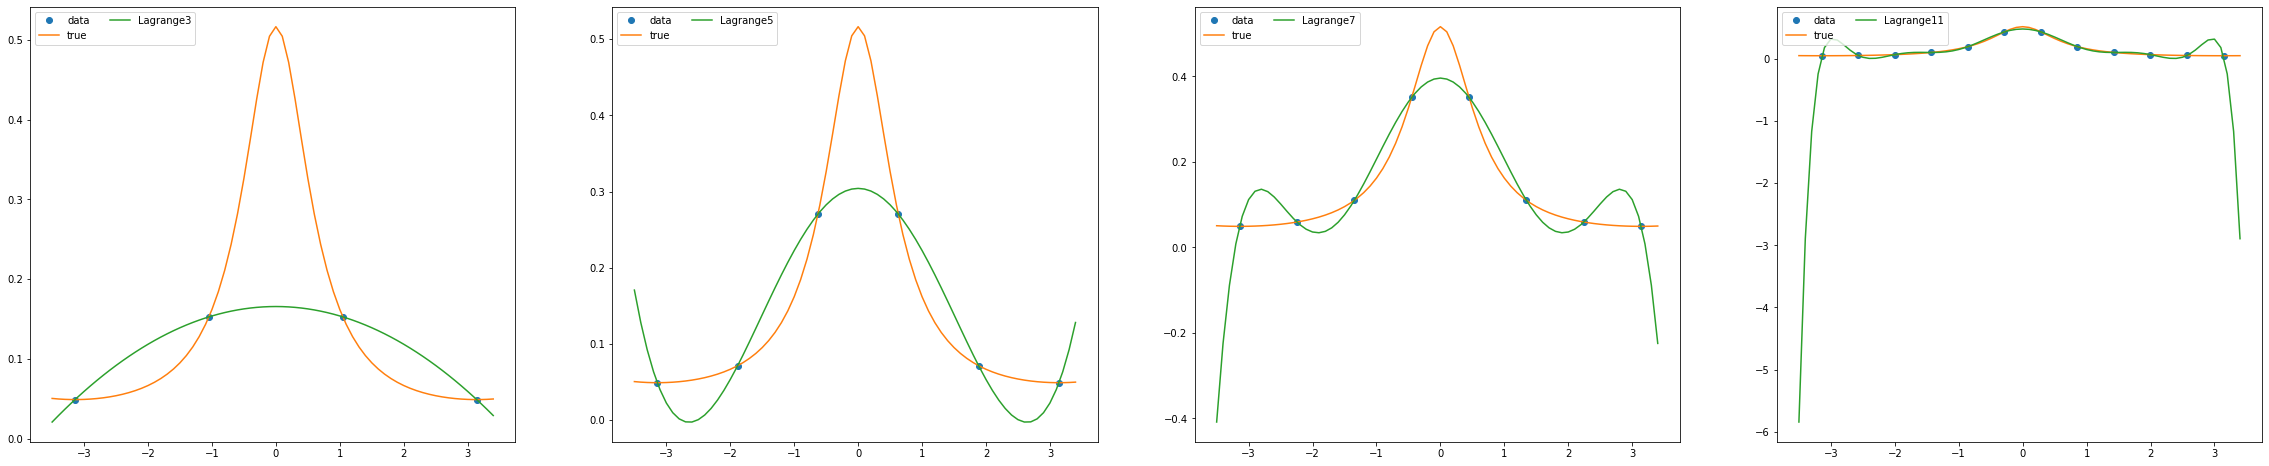

In [51]:
x3 = np.linspace(-np.pi, np.pi, 4)
y3 = u(x3)
L3 = sp.interpolate.lagrange(x3, y3)

x5 = np.linspace(-np.pi, np.pi, 6)
y5 = u(x5)
L5 = sp.interpolate.lagrange(x5, y5)

x7 = np.linspace(-np.pi, np.pi, 8)
y7 = u(x7)
L7 = sp.interpolate.lagrange(x7, y7)

x11 = np.linspace(-np.pi, np.pi, 12)
y11 = u(x11)
L11 = sp.interpolate.lagrange(x11, y11)

xs = np.arange(-3.5, 3.5, 0.1)

fig, ax = plt.subplots(1,4, figsize=(40, 8))
ax[0].plot(x3, y3, 'o', label='data')
ax[0].plot(xs,  u(xs), label='true')
ax[0].plot(xs, L3(xs), label="Lagrange3")
ax[1].plot(x5, y5, 'o', label='data')
ax[1].plot(xs, u(xs), label='true')
ax[1].plot(xs, L5(xs), label="Lagrange5")
ax[2].plot(x7, y7, 'o', label='data')
ax[2].plot(xs, u(xs), label='true')
ax[2].plot(xs, L7(xs), label="Lagrange7")
ax[3].plot(x11, y11, 'o', label='data')
ax[3].plot(xs, u(xs), label='true')
ax[3].plot(xs, L11(xs), label="Lagrange11")

ax[0].legend(loc='upper left', ncol=2)
ax[1].legend(loc='upper left', ncol=2)
ax[2].legend(loc='upper left', ncol=2)
ax[3].legend(loc='upper left', ncol=2)

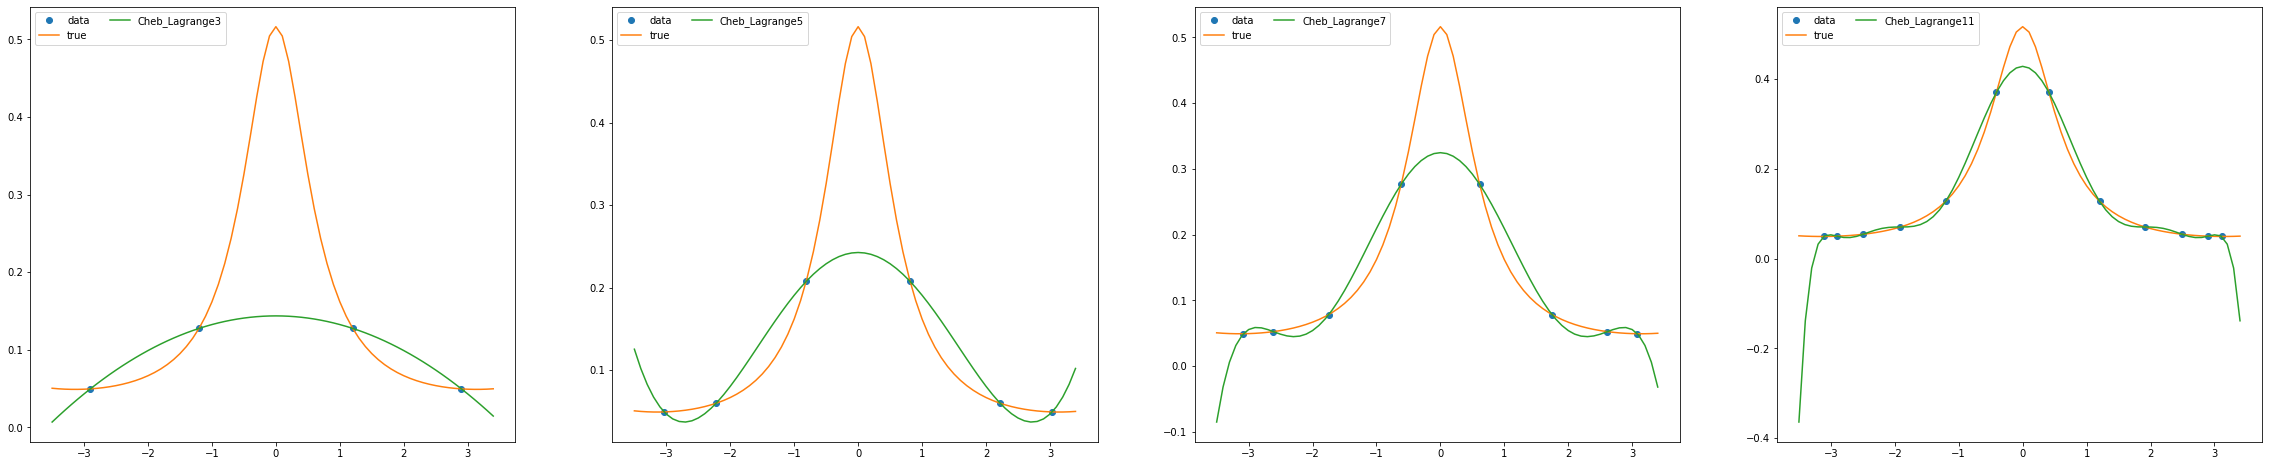

In [54]:
x3 =  cheb_nodes(4, -np.pi, np.pi)
y3 = u(x3)
L3 = sp.interpolate.lagrange(x3, y3)
np
x5 = cheb_nodes(6, -np.pi, np.pi)
y5 = u(x5)
L5 = sp.interpolate.lagrange(x5, y5)

x7 = cheb_nodes(8, -np.pi, np.pi)
y7 = u(x7)
L7 = sp.interpolate.lagrange(x7, y7)

x11 = cheb_nodes(12, -np.pi, np.pi)
y11 = u(x11)
L11 = sp.interpolate.lagrange(x11, y11)

xs = np.arange(-3.5, 3.5, 0.1)

fig, ax = plt.subplots(1,4, figsize=(40, 8))
ax[0].plot(x3, y3, 'o', label='data')
ax[0].plot(xs,  u(xs), label='true')
ax[0].plot(xs, L3(xs), label="Cheb_Lagrange3")
ax[1].plot(x5, y5, 'o', label='data')
ax[1].plot(xs, u(xs), label='true')
ax[1].plot(xs, L5(xs), label="Cheb_Lagrange5")
ax[2].plot(x7, y7, 'o', label='data')
ax[2].plot(xs, u(xs), label='true')
ax[2].plot(xs, L7(xs), label="Cheb_Lagrange7")
ax[3].plot(x11, y11, 'o', label='data')
ax[3].plot(xs, u(xs), label='true')
ax[3].plot(xs, L11(xs), label="Cheb_Lagrange11")

ax[0].legend(loc='upper left', ncol=2)
ax[1].legend(loc='upper left', ncol=2)
ax[2].legend(loc='upper left', ncol=2)
ax[3].legend(loc='upper left', ncol=2)

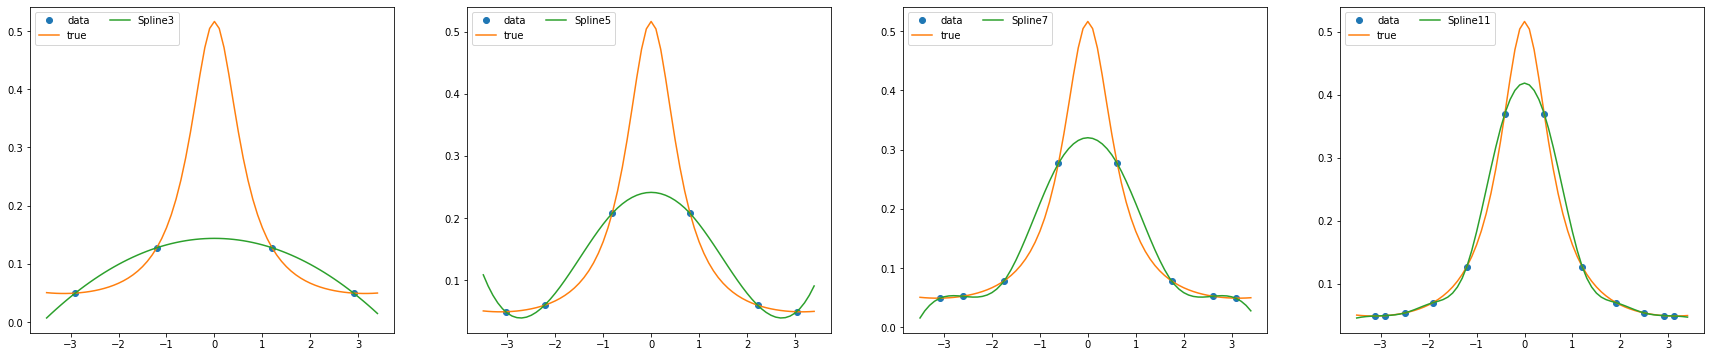

In [53]:
x3 =  cheb_nodes(4, -np.pi, np.pi)
y3 = u(x3)
S3 = sp.interpolate.CubicSpline(x3, y3)
np
x5 = cheb_nodes(6, -np.pi, np.pi)
y5 = u(x5)
S5 =  sp.interpolate.CubicSpline(x5, y5)

x7 = cheb_nodes(8, -np.pi, np.pi)
y7 = u(x7)
S7 =  sp.interpolate.CubicSpline(x7, y7)

x11 = cheb_nodes(12, -np.pi, np.pi)
y11 = u(x11)
S11 =  sp.interpolate.CubicSpline(x11, y11)

xs = np.arange(-3.5, 3.5, 0.1)

fig, ax = plt.subplots(1,4, figsize=(30, 6))
ax[0].plot(x3, y3, 'o', label='data')
ax[0].plot(xs,  u(xs), label='true')
ax[0].plot(xs, S3(xs), label="Spline3")
ax[1].plot(x5, y5, 'o', label='data')
ax[1].plot(xs, u(xs), label='true')
ax[1].plot(xs, S5(xs), label="Spline5")
ax[2].plot(x7, y7, 'o', label='data')
ax[2].plot(xs, u(xs), label='true')
ax[2].plot(xs, S7(xs), label="Spline7")
ax[3].plot(x11, y11, 'o', label='data')
ax[3].plot(xs, u(xs), label='true')
ax[3].plot(xs, S11(xs), label="Spline11")

ax[0].legend(loc='upper left', ncol=2)
ax[1].legend(loc='upper left', ncol=2)
ax[2].legend(loc='upper left', ncol=2)
ax[3].legend(loc='upper left', ncol=2)

Постройте интерполяцию функций

$$
y_{1}(x)=\sin (6 x)+\sin \left(60 e^{x}\right), y_{2}(x)=\frac{1}{1+1000(x+0.5)^{2}}+\frac{1}{\sqrt{1+1000(x-0.5)^{2}}}
$$

на отрезке $[-1,1]$ полиномами Чебышева. Постройте зависимость ошибки приближения от количества узлов. Сколько узлов нужно удержать в каждом из этих случаев для получения достаточно точного приближения?

In [21]:
y1 = lambda x: np.sin(6 * x) + np.sin(60 * np.exp(x))
y2 = lambda x: 1 / (1 + 1000 * (x + 0.5)**2) + 1 / np.sqrt(1 + 1000 * (x-0.5)**2)

In [22]:
# считаем ошибку как максимум отклонения
def GetError(y, N):
    x0 = np.linspace(-1, 1, 400)
    CHF = np.polynomial.chebyshev.Chebyshev.interpolate(y, N)
    return max(np.abs(y(x0)-CHF(x0)))


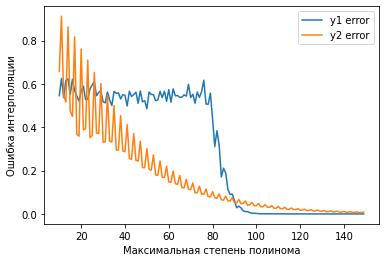

In [24]:
ns = range(10, 150);

error1 = [GetError(y1, n)/4 for n in ns] 
error2 = [GetError(y2, n) for n in ns]

plt.plot(ns, error1, label="y1 error")
plt.plot(ns, error2, label="y2 error")
plt.xlabel("Максимальная степень полинома")
plt.ylabel("Ошибка интерполяции")
plt.legend()
plt.show()

Вектора х4 и у4 из архива дают значения некоторой функции на равномерной сетке на отрезке [-0.75, 0.75]. Используя scipy . optimize.curve_fit, постройте интерполяцию функции $y(x)$ функциями вида

$$
y_{1}(x)=p_{0}+p_{1} x+p_{2} x^{2}+p_{3} x^{3}+p_{4} x^{4}+p_{5} x^{5}, y_{2}(x)=\frac{p_{0}+p_{1} x+p_{2} x^{2}+p_{3} x^{3}}{1+q_{1} x+q_{2} x^{2}}
$$


Какая из этих формул лучше описывает $y(x)$ на заданном интервале? Постройте график экстраполяции $y(x)$ за пределы исходных данных. Можете ли вы угадать аналитическое выражение для $y(x) ?$

In [27]:
from scipy.optimize import curve_fit

In [30]:

x4 = data["x4"]
y4 = data["y4"]
def f1(x, p0, p1, p2, p3, p4, p5):
    return p0 + p1 * x + p2 * x**2 + p3 * x**3 + p4 * x**4 + p5 * x**5

def f2(x, p0, p1, p2, p3, q1, q2):
    return (p0 + p1 * x + p2 * x**2 + p3 * x**3) / (1 + q1 * x + q2 * x**2)

In [37]:
popt1, *_ = curve_fit(f1, x4, y4)
popt2, *_ = curve_fit(f2, x4, y4)

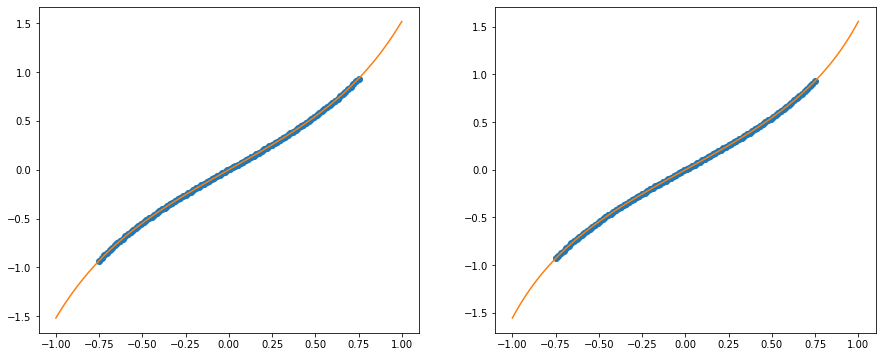

In [62]:
xs = np.linspace(-1, 1, 100)

fig, ax = plt.subplots(1, 2, figsize = (15, 6))
ax[0].plot(x4, y4, 'o', label = "data")
ax[0].plot(xs, f1(xs, *popt1), label = 'fit1')
ax[1].plot(x4, y4, 'o', label = "data")
ax[1].plot(xs, f2(xs, *popt2), label = 'fit2')

Угадаем выражение для y(x) как tg(x). Посмотрим на разницу приближений, и изобразим на графики.
Очевидно, y2 приближает лучше, чем y1

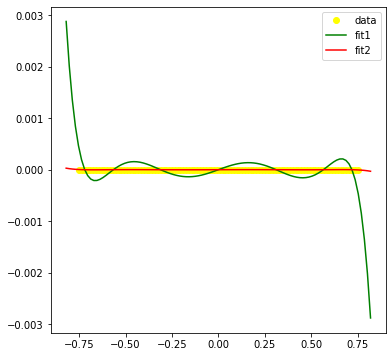

In [69]:
xs = np.linspace(-0.82, 0.82, 100)

fig, ax = plt.subplots(figsize = (6,6))
ax.plot(x4, y4 - np.tan(x4), 'o', color = 'yellow',  label = "data")
ax.plot(xs, f1(xs, *popt1) - np.tan(xs), color = 'green', label = 'fit1')
ax.plot(xs, f2(xs, *popt2) - np.tan(xs), color = 'red', label = 'fit2')

ax.legend(loc = 'upper right')

Вектора х5 и у5 из архива задают некоторую функцию на равномерной сетке на отрезке $[-1,1] .$ 

Составьте соответствующий интерполяционный многочлен и постройте его график. Ожидаемо, получившийся интерполянт демонстрирует явление Рунге. Теперь проделайте замену переменной $x \rightarrow s$ по формуле $x=g(s)$, где
$$
g(s)=\frac{1}{53089}\left(40320 s+6720 s^{3}+3024 s^{5}+1800 s^{7}+1225 s^{9}\right)
$$

 функция, приближённо отображающая равномерную сетку в сетку узлов Чебышева. В новой переменной $s$, составьте интерполяционный многочлен $P(s) .$ Постройте график получившейся интерполяции исходной функции $P(s(x))$. Делает ли такая процедура явление Рунге менее выраженным? 

In [ ]:
x5 = data["x5"]
y5 = data["y5"]

In [70]:
def g(s): return (40320 * s + 6720 * s**3 + 3024 * s**5 + 1800 * s**7 + 1225 * s**9) / 53089

(-0.5, 1.5)

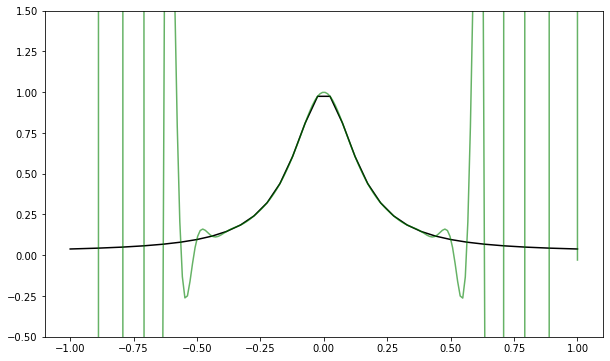

In [74]:


L = sp.interpolate.lagrange(g(x5), y5);

x0 = np.linspace(-1, 1, 200)
fig, ax = plt.subplots(figsize = (10, 6))
ax.plot(g(x5), y5, color="k") 
ax.plot(x0, L(x0), color="g", alpha=0.6) 
ax.set_ylim(-0.5, 1.5)
